<a href="https://colab.research.google.com/github/mstale007/Automated_Image_Classification_Pipeline/blob/master/COVID_XRAYS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D,Flatten, Dropout
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
import keras.applications as ka
dir(ka)

['DenseNet121',
 'DenseNet169',
 'DenseNet201',
 'InceptionResNetV2',
 'InceptionV3',
 'MobileNet',
 'MobileNetV2',
 'NASNetLarge',
 'NASNetMobile',
 'ResNet101',
 'ResNet101V2',
 'ResNet152',
 'ResNet152V2',
 'ResNet50',
 'ResNet50V2',
 'VGG16',
 'VGG19',
 'Xception',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_import',
 'backend',
 'densenet',
 'division',
 'inception_resnet_v2',
 'inception_v3',
 'keras_applications',
 'keras_modules_injection',
 'layers',
 'mobilenet',
 'mobilenet_v2',
 'models',
 'nasnet',
 'print_function',
 'resnet',
 'resnet50',
 'resnet_v2',
 'utils',
 'vgg16',
 'vgg19',
 'xception']

In [ ]:
from keras.applications import DenseNet201
from keras.applications import InceptionResNetV2
from keras.applications import InceptionV3
from keras.applications import MobileNetV2
from keras.applications import NASNetLarge
from keras.applications import NASNetMobile
from keras.applications import ResNet101
from keras.applications import ResNet152V2
from keras.applications import VGG16
from keras.applications import VGG19
from keras.applications import Xception

# MobileNet

In [ ]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 1s 0us/step


In [ ]:
x1=base_model.output
x1=GlobalAveragePooling2D()(x1)
#x1=Flatten(name="flatten")(x1)
x1=Dense(64,activation='relu')(x1) #we add dense layers so that the model can learn more complex1 functions and classify for better results.
x1=Dropout(0.5)(x1)
#x1=Dense(1024,activation='relu')(x1) #dense layer 2
#x1=Dense(512,activation='relu')(x1) #dense layer 3
preds=Dense(2,activation='softmax')(x1) #final layer with softmax activation

In [ ]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [ ]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True
# for layer in base_model.layers[:]:
#     layer.trainable=False

In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/gdrive/My Drive/COVID Dataset/data/train/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 8624 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
EPOCHS=10
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
history=model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=EPOCHS,verbose=1)
print(history)

Epoch 1/10
269/269 [==============================] - 4064s 15s/step - loss: 0.0824 - accuracy: 0.9766
Epoch 2/10
269/269 [==============================] - 184s 685ms/step - loss: 0.0409 - accuracy: 0.9861
Epoch 3/10
269/269 [==============================] - 162s 601ms/step - loss: 0.0225 - accuracy: 0.9930
Epoch 4/10
269/269 [==============================] - 160s 596ms/step - loss: 0.0177 - accuracy: 0.9946
Epoch 5/10
269/269 [==============================] - 160s 596ms/step - loss: 0.0145 - accuracy: 0.9953
Epoch 6/10
269/269 [==============================] - 160s 596ms/step - loss: 0.0154 - accuracy: 0.9943
Epoch 7/10
269/269 [==============================] - 160s 595ms/step - loss: 0.0054 - accuracy: 0.9986
Epoch 8/10
269/269 [==============================] - 159s 592ms/step - loss: 0.0094 - accuracy: 0.9980
Epoch 9/10
269/269 [==============================] - 157s 585ms/step - loss: 0.0155 - accuracy: 0.9944
Epoch 10/10
269/269 [==============================] - 160s 596ms

In [ ]:
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

test_generator=train_datagen.flow_from_directory('/gdrive/My Drive/COVID Dataset/data/test/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 1005 images belonging to 2 classes.


In [ ]:
scores=model.evaluate_generator(generator=test_generator,verbose=1)

32/32 [==============================] - 439s 14s/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_generator)
y_pred_MobileNet = np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred_MobileNet))
print('Classification Report')
target_names = ['Normal', 'Positive']
print(classification_report(test_generator.classes, y_pred_MobileNet, target_names=target_names))

Confusion Matrix
[[  1  99]
 [ 40 865]]
Classification Report
              precision    recall  f1-score   support

      Normal       0.02      0.01      0.01       100
    Positive       0.90      0.96      0.93       905

    accuracy                           0.86      1005
   macro avg       0.46      0.48      0.47      1005
weighted avg       0.81      0.86      0.83      1005



In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


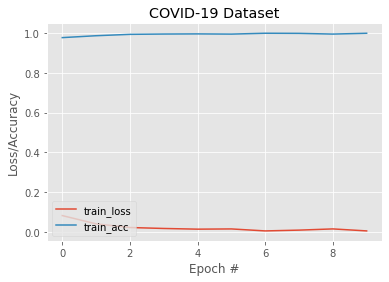

In [ ]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
#plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("MobileNet.png")

In [ ]:
print("Accuracy = ", scores[1])

Accuracy =  0.937313437461853


# DenseNet201

In [ ]:
base_model=DenseNet201(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
x1=base_model.output
x1=GlobalAveragePooling2D(pool_size=(4,4))(x1)
x1=Flatten(name="flatten")(x1)
x1=Dense(64,activation='relu')(x1) #we add dense layers so that the model can learn more complex1 functions and classify for better results.
x1=Dropout(0.5)(x1)
#x1=Dense(1024,activation='relu')(x1) #dense layer 2
#x1=Dense(512,activation='relu')(x1) #dense layer 3
preds=Dense(2,activation='softmax')(x1) #final layer with softmax activation

# x1=base_model.output
# x1=GlobalAveragePooling2D()(x1)
# x1=Dense(1024,activation='relu')(x1) #we add dense layers so that the model can learn more complex1 functions and classify for better results.
# x1=Dense(1024,activation='relu')(x1) #dense layer 2
# x1=Dense(512,activation='relu')(x1) #dense layer 3
# preds=Dense(2,activation='softmax')(x1) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/gdrive/My Drive/COVID Dataset/Train/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
history=model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10,verbose=1)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

test_generator=train_datagen.flow_from_directory('/gdrive/My Drive/COVID Dataset/Test/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
scores=model.evaluate_generator(generator=test_generator,verbose=1)
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_generator)
y_pred_DenseNet201 = np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred_DenseNet201))
print('Classification Report')
target_names = ['Normal', 'Positive']
print(classification_report(test_generator.classes, y_pred_DenseNet201, target_names=target_names))

74842112/74836368 [==============================] - 7s 0us/step
Found 348 images belonging to 2 classes.
Epoch 1/10
10/10 [==============================] - 122s 12s/step - loss: 0.5536 - accuracy: 0.8250
Epoch 2/10
10/10 [==============================] - 30s 3s/step - loss: 0.0187 - accuracy: 0.9936
Epoch 3/10
10/10 [==============================] - 23s 2s/step - loss: 4.7462e-04 - accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 23s 2s/step - loss: 0.0302 - accuracy: 0.9906
Epoch 5/10
10/10 [==============================] - 23s 2s/step - loss: 0.0857 - accuracy: 0.9872
Epoch 6/10
10/10 [==============================] - 23s 2s/step - loss: 0.0066 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 23s 2s/step - loss: 0.0015 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 23s 2s/step - loss: 3.0352e-04 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 23s 2s/step - loss: 1.6279e-04 - accuracy: 1.000

# InceptionResNetV2

In [ ]:
base_model=InceptionResNetV2(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
x1=base_model.output
x1=GlobalAveragePooling2D(pool_size=(4,4))(x1)
x1=Flatten(name="flatten")(x1)
x1=Dense(64,activation='relu')(x1) #we add dense layers so that the model can learn more complex1 functions and classify for better results.
x1=Dropout(0.5)(x1)
#x1=Dense(1024,activation='relu')(x1) #dense layer 2
#x1=Dense(512,activation='relu')(x1) #dense layer 3
preds=Dense(2,activation='softmax')(x1) #final layer with softmax activation

# x1=base_model.output
# x1=GlobalAveragePooling2D()(x1)
# x1=Dense(1024,activation='relu')(x1) #we add dense layers so that the model can learn more complex1 functions and classify for better results.
# x1=Dense(1024,activation='relu')(x1) #dense layer 2
# x1=Dense(512,activation='relu')(x1) #dense layer 3
# preds=Dense(2,activation='softmax')(x1) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/gdrive/My Drive/COVID Dataset/Train/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
history=model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10,verbose=1)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

test_generator=train_datagen.flow_from_directory('/gdrive/My Drive/COVID Dataset/Test/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
scores=model.evaluate_generator(generator=test_generator,verbose=1)
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_generator)
y_pred_InceptionResNetV2 = np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred_InceptionResNetV2))
print('Classification Report')
target_names = ['Normal', 'Positive']
print(classification_report(test_generator.classes, y_pred_InceptionResNetV2, target_names=target_names))

219062272/219055592 [==============================] - 18s 0us/step
Found 348 images belonging to 2 classes.
Epoch 1/10
10/10 [==============================] - 98s 10s/step - loss: 0.3566 - accuracy: 0.8703
Epoch 2/10
10/10 [==============================] - 18s 2s/step - loss: 0.0275 - accuracy: 0.9873
Epoch 3/10
10/10 [==============================] - 18s 2s/step - loss: 0.0147 - accuracy: 0.9937
Epoch 4/10
10/10 [==============================] - 18s 2s/step - loss: 0.0458 - accuracy: 0.9840
Epoch 5/10
10/10 [==============================] - 18s 2s/step - loss: 0.0056 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 17s 2s/step - loss: 9.4629e-05 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 18s 2s/step - loss: 0.0014 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 18s 2s/step - loss: 0.0092 - accuracy: 0.9936
Epoch 9/10
10/10 [==============================] - 18s 2s/step - loss: 0.0056 - accuracy: 0.9969
Epoc

# InceptionV3

In [ ]:
base_model=InceptionV3(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
x1=base_model.output
x1=GlobalAveragePooling2D(pool_size=(4,4))(x1)
x1=Flatten(name="flatten")(x1)
x1=Dense(64,activation='relu')(x1) #we add dense layers so that the model can learn more complex1 functions and classify for better results.
x1=Dropout(0.5)(x1)
#x1=Dense(1024,activation='relu')(x1) #dense layer 2
#x1=Dense(512,activation='relu')(x1) #dense layer 3
preds=Dense(2,activation='softmax')(x1) #final layer with softmax activation

# x1=base_model.output
# x1=GlobalAveragePooling2D()(x1)
# x1=Dense(1024,activation='relu')(x1) #we add dense layers so that the model can learn more complex1 functions and classify for better results.
# x1=Dense(1024,activation='relu')(x1) #dense layer 2
# x1=Dense(512,activation='relu')(x1) #dense layer 3
# preds=Dense(2,activation='softmax')(x1) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/gdrive/My Drive/COVID Dataset/Train/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
history=model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10,verbose=1)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

test_generator=train_datagen.flow_from_directory('/gdrive/My Drive/COVID Dataset/Test/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
scores=model.evaluate_generator(generator=test_generator,verbose=1)
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_generator)
y_pred_InceptionV3 = np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred_InceptionV3))
print('Classification Report')
target_names = ['Normal', 'Positive']
print(classification_report(test_generator.classes, y_pred_InceptionV3, target_names=target_names))

87916544/87910968 [==============================] - 8s 0us/step
Found 348 images belonging to 2 classes.
Epoch 1/10
10/10 [==============================] - 38s 4s/step - loss: 0.7775 - accuracy: 0.7911
Epoch 2/10
10/10 [==============================] - 12s 1s/step - loss: 0.0547 - accuracy: 0.9810
Epoch 3/10
10/10 [==============================] - 14s 1s/step - loss: 0.0144 - accuracy: 0.9937
Epoch 4/10
10/10 [==============================] - 13s 1s/step - loss: 0.0036 - accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 13s 1s/step - loss: 0.0263 - accuracy: 0.9936
Epoch 6/10
10/10 [==============================] - 13s 1s/step - loss: 0.0161 - accuracy: 0.9968
Epoch 7/10
10/10 [==============================] - 14s 1s/step - loss: 0.0235 - accuracy: 0.9937
Epoch 8/10
10/10 [==============================] - 12s 1s/step - loss: 0.0623 - accuracy: 0.9873
Epoch 9/10
10/10 [==============================] - 14s 1s/step - loss: 0.1289 - accuracy: 0.9563
Epoch 10/10


# MobileNetV2

In [ ]:
base_model=MobileNetV2(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
x1=base_model.output
x1=GlobalAveragePooling2D(pool_size=(4,4))(x1)
x1=Flatten(name="flatten")(x1)
x1=Dense(64,activation='relu')(x1) #we add dense layers so that the model can learn more complex1 functions and classify for better results.
x1=Dropout(0.5)(x1)
#x1=Dense(1024,activation='relu')(x1) #dense layer 2
#x1=Dense(512,activation='relu')(x1) #dense layer 3
preds=Dense(2,activation='softmax')(x1) #final layer with softmax activation

# x1=base_model.output
# x1=GlobalAveragePooling2D()(x1)
# x1=Dense(1024,activation='relu')(x1) #we add dense layers so that the model can learn more complex1 functions and classify for better results.
# x1=Dense(1024,activation='relu')(x1) #dense layer 2
# x1=Dense(512,activation='relu')(x1) #dense layer 3
# preds=Dense(2,activation='softmax')(x1) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/gdrive/My Drive/COVID Dataset/Train/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
history=model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10,verbose=1)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

test_generator=train_datagen.flow_from_directory('/gdrive/My Drive/COVID Dataset/Test/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
scores=model.evaluate_generator(generator=test_generator,verbose=1)
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_generator)
y_pred_MobileNetV2 = np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred_MobileNetV2))
print('Classification Report')
target_names = ['Normal', 'Positive']
print(classification_report(test_generator.classes, y_pred_MobileNetV2, target_names=target_names))

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 2s 0us/step
Found 348 images belonging to 2 classes.
Epoch 1/10
10/10 [==============================] - 25s 3s/step - loss: 0.2728 - accuracy: 0.8323
Epoch 2/10
10/10 [==============================] - 11s 1s/step - loss: 0.0450 - accuracy: 0.9968
Epoch 3/10
10/10 [==============================] - 13s 1s/step - loss: 0.0468 - accuracy: 0.9873
Epoch 4/10
10/10 [==============================] - 12s 1s/step - loss: 0.0415 - accuracy: 0.9844
Epoch 5/10
10/10 [==============================] - 12s 1s/step - loss: 0.0037 - accuracy: 0.9968
Epoch 6/10
10/10 [==============================] - 12s 1s/step - loss: 0.0052 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 12s 1s/step - loss: 0.0215 - accuracy: 0.9937
Epoch 8/10
10/10 [==============================] - 12s 1s/step - loss: 0.0459 - accuracy: 0.9937
Epoch 9/10
10/10 [==============================] - 12s 1s/step - loss: 0.0421 - accuracy: 0.9937
Epoch 10/10
10

# NASNetLarge

In [ ]:
base_model=NASNetLarge(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
x1=base_model.output
x1=GlobalAveragePooling2D(pool_size=(4,4))(x1)
x1=Flatten(name="flatten")(x1)
x1=Dense(64,activation='relu')(x1) #we add dense layers so that the model can learn more complex1 functions and classify for better results.
x1=Dropout(0.5)(x1)
#x1=Dense(1024,activation='relu')(x1) #dense layer 2
#x1=Dense(512,activation='relu')(x1) #dense layer 3
preds=Dense(2,activation='softmax')(x1) #final layer with softmax activation

# x1=base_model.output
# x1=GlobalAveragePooling2D()(x1)
# x1=Dense(1024,activation='relu')(x1) #we add dense layers so that the model can learn more complex1 functions and classify for better results.
# x1=Dense(1024,activation='relu')(x1) #dense layer 2
# x1=Dense(512,activation='relu')(x1) #dense layer 3
# preds=Dense(2,activation='softmax')(x1) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/gdrive/My Drive/COVID Dataset/Train/', # this is where you specify the path to the main data folder
                                                 target_size=(331, 331),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
history=model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10,verbose=1)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

test_generator=train_datagen.flow_from_directory('/gdrive/My Drive/COVID Dataset/Test/', # this is where you specify the path to the main data folder
                                                 target_size=(331, 331),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
scores=model.evaluate_generator(generator=test_generator,verbose=1)
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_generator)
y_pred_NASNetLarge = np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred_NASNetLarge))
print('Classification Report')
target_names = ['Normal', 'Positive']
print(classification_report(test_generator.classes, y_pred_NASNetLarge, target_names=target_names))

Found 348 images belonging to 2 classes.
Epoch 1/10


ResourceExhaustedError: ignored

# NASNetMobile

In [ ]:
base_model=NASNetMobile(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
x1=base_model.output
x1=GlobalAveragePooling2D(pool_size=(4,4))(x1)
x1=Flatten(name="flatten")(x1)
x1=Dense(64,activation='relu')(x1) #we add dense layers so that the model can learn more complex1 functions and classify for better results.
x1=Dropout(0.5)(x1)
#x1=Dense(1024,activation='relu')(x1) #dense layer 2
#x1=Dense(512,activation='relu')(x1) #dense layer 3
preds=Dense(2,activation='softmax')(x1) #final layer with softmax activation

# x1=base_model.output
# x1=GlobalAveragePooling2D()(x1)
# x1=Dense(1024,activation='relu')(x1) #we add dense layers so that the model can learn more complex1 functions and classify for better results.
# x1=Dense(1024,activation='relu')(x1) #dense layer 2
# x1=Dense(512,activation='relu')(x1) #dense layer 3
# preds=Dense(2,activation='softmax')(x1) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/gdrive/My Drive/COVID Dataset/Train/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
history=model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10,verbose=1)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

test_generator=train_datagen.flow_from_directory('/gdrive/My Drive/COVID Dataset/Test/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
scores=model.evaluate_generator(generator=test_generator,verbose=1)
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_generator)
y_pred_NASNetMobile = np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred_NASNetMobile))
print('Classification Report')
target_names = ['Normal', 'Positive']
print(classification_report(test_generator.classes, y_pred_NASNetMobile, target_names=target_names))

19996672/19993432 [==============================] - 2s 0us/step
Found 348 images belonging to 2 classes.
Epoch 1/10
10/10 [==============================] - 124s 12s/step - loss: 0.4668 - accuracy: 0.7785
Epoch 2/10
10/10 [==============================] - 14s 1s/step - loss: 0.0064 - accuracy: 0.9968
Epoch 3/10
10/10 [==============================] - 14s 1s/step - loss: 0.1307 - accuracy: 0.9842
Epoch 4/10
10/10 [==============================] - 14s 1s/step - loss: 0.0298 - accuracy: 0.9875
Epoch 5/10
10/10 [==============================] - 13s 1s/step - loss: 0.0129 - accuracy: 0.9968
Epoch 6/10
10/10 [==============================] - 14s 1s/step - loss: 4.9640e-04 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 14s 1s/step - loss: 1.7771e-06 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 14s 1s/step - loss: 0.0366 - accuracy: 0.9937
Epoch 9/10
10/10 [==============================] - 14s 1s/step - loss: 0.0763 - accuracy: 0.9937
Ep

# ResNet101

In [ ]:
base_model=ResNet101(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
x1=base_model.output
x1=GlobalAveragePooling2D(pool_size=(4,4))(x1)
x1=Flatten(name="flatten")(x1)
x1=Dense(64,activation='relu')(x1) #we add dense layers so that the model can learn more complex1 functions and classify for better results.
x1=Dropout(0.5)(x1)
#x1=Dense(1024,activation='relu')(x1) #dense layer 2
#x1=Dense(512,activation='relu')(x1) #dense layer 3
preds=Dense(2,activation='softmax')(x1) #final layer with softmax activation

# x1=base_model.output
# x1=GlobalAveragePooling2D()(x1)
# x1=Dense(1024,activation='relu')(x1) #we add dense layers so that the model can learn more complex1 functions and classify for better results.
# x1=Dense(1024,activation='relu')(x1) #dense layer 2
# x1=Dense(512,activation='relu')(x1) #dense layer 3
# preds=Dense(2,activation='softmax')(x1) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/gdrive/My Drive/COVID Dataset/Train/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
history=model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10,verbose=1)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

test_generator=train_datagen.flow_from_directory('/gdrive/My Drive/COVID Dataset/Test/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
scores=model.evaluate_generator(generator=test_generator,verbose=1)
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_generator)
y_pred_ResNet101 = np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred_ResNet101))
print('Classification Report')
target_names = ['Normal', 'Positive']
print(classification_report(test_generator.classes, y_pred_ResNet101, target_names=target_names))

Found 348 images belonging to 2 classes.
Epoch 1/10
10/10 [==============================] - 69s 7s/step - loss: 0.2630 - accuracy: 0.9114
Epoch 2/10
10/10 [==============================] - 21s 2s/step - loss: 0.5377 - accuracy: 0.9594
Epoch 3/10
10/10 [==============================] - 20s 2s/step - loss: 0.0313 - accuracy: 0.9936
Epoch 4/10
10/10 [==============================] - 20s 2s/step - loss: 0.2732 - accuracy: 0.9937
Epoch 5/10
10/10 [==============================] - 20s 2s/step - loss: 0.0405 - accuracy: 0.9905
Epoch 6/10
10/10 [==============================] - 20s 2s/step - loss: 0.0463 - accuracy: 0.9936
Epoch 7/10
10/10 [==============================] - 20s 2s/step - loss: 0.0286 - accuracy: 0.9905
Epoch 8/10
10/10 [==============================] - 20s 2s/step - loss: 0.0319 - accuracy: 0.9937
Epoch 9/10
10/10 [==============================] - 20s 2s/step - loss: 0.0139 - accuracy: 0.9968
Epoch 10/10
10/10 [==============================] - 20s 2s/step - loss: 0.00

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ResNet152V2

In [ ]:
base_model=ResNet152V2(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
x1=base_model.output
x1=GlobalAveragePooling2D(pool_size=(4,4))(x1)
x1=Flatten(name="flatten")(x1)
x1=Dense(64,activation='relu')(x1) #we add dense layers so that the model can learn more complex1 functions and classify for better results.
x1=Dropout(0.5)(x1)
#x1=Dense(1024,activation='relu')(x1) #dense layer 2
#x1=Dense(512,activation='relu')(x1) #dense layer 3
preds=Dense(2,activation='softmax')(x1) #final layer with softmax activation

# x1=base_model.output
# x1=GlobalAveragePooling2D()(x1)
# x1=Dense(1024,activation='relu')(x1) #we add dense layers so that the model can learn more complex1 functions and classify for better results.
# x1=Dense(1024,activation='relu')(x1) #dense layer 2
# x1=Dense(512,activation='relu')(x1) #dense layer 3
# preds=Dense(2,activation='softmax')(x1) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/gdrive/My Drive/COVID Dataset/Train/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
history=model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10,verbose=1)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

test_generator=train_datagen.flow_from_directory('/gdrive/My Drive/COVID Dataset/Test/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
scores=model.evaluate_generator(generator=test_generator,verbose=1)
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_generator)
y_pred_ResNet152V2 = np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred_ResNet152V2))
print('Classification Report')
target_names = ['Normal', 'Positive']
print(classification_report(test_generator.classes, y_pred_ResNet152V2, target_names=target_names))

234553344/234545216 [==============================] - 16s 0us/step
Found 348 images belonging to 2 classes.
Epoch 1/10


ResourceExhaustedError: ignored

# VGG16

In [ ]:
base_model=VGG16(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
x1=base_model.output
x1=GlobalAveragePooling2D(pool_size=(4,4))(x1)
x1=Flatten(name="flatten")(x1)
x1=Dense(64,activation='relu')(x1) #we add dense layers so that the model can learn more complex1 functions and classify for better results.
x1=Dropout(0.5)(x1)
#x1=Dense(1024,activation='relu')(x1) #dense layer 2
#x1=Dense(512,activation='relu')(x1) #dense layer 3
preds=Dense(2,activation='softmax')(x1) #final layer with softmax activation

# x1=base_model.output
# x1=GlobalAveragePooling2D()(x1)
# x1=Dense(1024,activation='relu')(x1) #we add dense layers so that the model can learn more complex1 functions and classify for better results.
# x1=Dense(1024,activation='relu')(x1) #dense layer 2
# x1=Dense(512,activation='relu')(x1) #dense layer 3
# preds=Dense(2,activation='softmax')(x1) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/gdrive/My Drive/COVID Dataset/Train/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
history=model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10,verbose=1)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

test_generator=train_datagen.flow_from_directory('/gdrive/My Drive/COVID Dataset/Test/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
scores=model.evaluate_generator(generator=test_generator,verbose=1)
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_generator)
y_pred_VGG16 = np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred_VGG16))
print('Classification Report')
target_names = ['Normal', 'Positive']
print(classification_report(test_generator.classes, y_pred_VGG16, target_names=target_names))

58892288/58889256 [==============================] - 5s 0us/step
Found 348 images belonging to 2 classes.
Epoch 1/10
10/10 [==============================] - 13s 1s/step - loss: 0.6598 - accuracy: 0.6344
Epoch 2/10
10/10 [==============================] - 12s 1s/step - loss: 0.1496 - accuracy: 0.9715
Epoch 3/10
10/10 [==============================] - 11s 1s/step - loss: 0.0118 - accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 12s 1s/step - loss: 0.0095 - accuracy: 0.9936
Epoch 5/10
10/10 [==============================] - 11s 1s/step - loss: 0.0034 - accuracy: 0.9968
Epoch 6/10
10/10 [==============================] - 11s 1s/step - loss: 0.0015 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 12s 1s/step - loss: 0.0011 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 11s 1s/step - loss: 1.2495e-04 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 11s 1s/step - loss: 2.0681e-04 - accuracy: 1.0000
Epoc

# VGG19

In [ ]:
base_model=VGG19(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
x1=base_model.output
x1=GlobalAveragePooling2D(pool_size=(4,4))(x1)
x1=Flatten(name="flatten")(x1)
x1=Dense(64,activation='relu')(x1) #we add dense layers so that the model can learn more complex1 functions and classify for better results.
x1=Dropout(0.5)(x1)
#x1=Dense(1024,activation='relu')(x1) #dense layer 2
#x1=Dense(512,activation='relu')(x1) #dense layer 3
preds=Dense(2,activation='softmax')(x1) #final layer with softmax activation

# x1=base_model.output
# x1=GlobalAveragePooling2D()(x1)
# x1=Dense(1024,activation='relu')(x1) #we add dense layers so that the model can learn more complex1 functions and classify for better results.
# x1=Dense(1024,activation='relu')(x1) #dense layer 2
# x1=Dense(512,activation='relu')(x1) #dense layer 3
# preds=Dense(2,activation='softmax')(x1) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/gdrive/My Drive/COVID Dataset/Train/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
history=model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10,verbose=1)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

test_generator=train_datagen.flow_from_directory('/gdrive/My Drive/COVID Dataset/Test/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
scores=model.evaluate_generator(generator=test_generator,verbose=1)
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_generator)
y_pred_VGG19 = np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred_VGG19))
print('Classification Report')
target_names = ['Normal', 'Positive']
print(classification_report(test_generator.classes, y_pred_VGG19, target_names=target_names))

80142336/80134624 [==============================] - 8s 0us/step
Found 348 images belonging to 2 classes.
Epoch 1/10
10/10 [==============================] - 12s 1s/step - loss: 0.5753 - accuracy: 0.7469
Epoch 2/10
10/10 [==============================] - 12s 1s/step - loss: 0.0779 - accuracy: 0.9652
Epoch 3/10
10/10 [==============================] - 12s 1s/step - loss: 0.0869 - accuracy: 0.9712
Epoch 4/10
10/10 [==============================] - 12s 1s/step - loss: 0.0129 - accuracy: 0.9968
Epoch 5/10
10/10 [==============================] - 11s 1s/step - loss: 0.0067 - accuracy: 0.9968
Epoch 6/10
10/10 [==============================] - 12s 1s/step - loss: 0.0017 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 12s 1s/step - loss: 2.0238e-05 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 12s 1s/step - loss: 5.9193e-05 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 12s 1s/step - loss: 2.6621e-05 - accuracy: 1.0000


# Xception

In [ ]:
base_model=Xception(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
x1=base_model.output
x1=GlobalAveragePooling2D(pool_size=(4,4))(x1)
x1=Flatten(name="flatten")(x1)
x1=Dense(64,activation='relu')(x1) #we add dense layers so that the model can learn more complex1 functions and classify for better results.
x1=Dropout(0.5)(x1)
#x1=Dense(1024,activation='relu')(x1) #dense layer 2
#x1=Dense(512,activation='relu')(x1) #dense layer 3
preds=Dense(2,activation='softmax')(x1) #final layer with softmax activation

# x1=base_model.output
# x1=GlobalAveragePooling2D()(x1)
# x1=Dense(1024,activation='relu')(x1) #we add dense layers so that the model can learn more complex1 functions and classify for better results.
# x1=Dense(1024,activation='relu')(x1) #dense layer 2
# x1=Dense(512,activation='relu')(x1) #dense layer 3
# preds=Dense(2,activation='softmax')(x1) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/gdrive/My Drive/COVID Dataset/Train/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
history=model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10,verbose=1)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

test_generator=train_datagen.flow_from_directory('/gdrive/My Drive/COVID Dataset/Test/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
scores=model.evaluate_generator(generator=test_generator,verbose=1)
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_generator)
y_pred_Xception = np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred_Xception))
print('Classification Report')
target_names = ['Normal', 'Positive']
print(classification_report(test_generator.classes, y_pred_Xception, target_names=target_names))

83689472/83683744 [==============================] - 7s 0us/step
Found 348 images belonging to 2 classes.
Epoch 1/10
10/10 [==============================] - 33s 3s/step - loss: 0.4412 - accuracy: 0.8133
Epoch 2/10
10/10 [==============================] - 15s 1s/step - loss: 0.0650 - accuracy: 0.9842
Epoch 3/10
10/10 [==============================] - 14s 1s/step - loss: 0.3588 - accuracy: 0.9778
Epoch 4/10
10/10 [==============================] - 16s 2s/step - loss: 0.0572 - accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 15s 2s/step - loss: 0.1199 - accuracy: 0.9905
Epoch 6/10
10/10 [==============================] - 15s 2s/step - loss: 0.0166 - accuracy: 0.9968
Epoch 7/10
10/10 [==============================] - 15s 2s/step - loss: 0.0167 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 15s 1s/step - loss: 0.0012 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 16s 2s/step - loss: 5.8082e-04 - accuracy: 1.0000
Epoch 10

In [ ]:
import pandas as pd
Y_pred=pd.DataFrame({
    'DenseNet201':y_pred_DenseNet201,
    'InceptionResNetV2':y_pred_InceptionResNetV2,
    'InceptionV3':y_pred_InceptionV3,
    'MobileNet':y_pred_MobileNet,
    'MobileNetV2':y_pred_MobileNetV2,
    'NASNetMobile':y_pred_NASNetMobile,
    'ResNet101':y_pred_ResNet101,
    'VGG16':y_pred_VGG16,
    'VGG19':y_pred_VGG19,
    'Xception':y_pred_Xception,
})

In [ ]:
Y_pred.to_csv("Predictions.csv")

In [ ]:
Y_pred.corr()

,DenseNet201,InceptionResNetV2,InceptionV3,MobileNet,MobileNetV2,NASNetMobile,ResNet101,VGG16,VGG19,Xception
DenseNet201,1.000000,-0.015404,-0.015404,-0.091138,-0.179307,0.112594,NaN,-0.091138,-0.242607,-0.137305
InceptionResNetV2,-0.015404,1.000000,-0.074230,0.091036,0.097820,0.083538,NaN,0.008403,0.091036,0.032816
InceptionV3,-0.015404,-0.074230,1.000000,-0.074230,0.097820,-0.206389,NaN,-0.074230,0.173669,0.032816
MobileNet,-0.091138,0.091036,-0.074230,1.000000,-0.139360,0.083538,NaN,-0.074230,0.173669,0.116996
MobileNetV2,-0.179307,0.097820,0.097820,-0.139360,1.000000,-0.183359,NaN,0.097820,-0.060300,0.046413
NASNetMobile,0.112594,0.083538,-0.206389,0.083538,-0.183359,1.000000,NaN,0.083538,0.083538,0.080096
ResNet101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VGG16,-0.091138,0.008403,-0.074230,-0.074230,0.097820,0.083538,NaN,1.000000,0.256303,-0.051364
VGG19,-0.242607,0.091036,0.173669,0.173669,-0.060300,0.083538,NaN,0.256303,1.000000,-0.219724
Xception,-0.137305,0.032816,0.032816,0.116996,0.046413,0.080096,NaN,-0.051364,-0.219724,1.000000


In [ ]:
Y_corr=Y_pred.corr()
Y_corr.to_csv("Correlation.csv")